In [1]:
##Dataset = https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
##Amacımız araba almak isteyen kişinin istediği filtreleri filtrelemeleri yaparak bütçesine uygun bir araba almasını sağlamak.
#Bu sebeple öncelikle price prediction modeli oluşturup sonrasında filtreleme işlemleri yapacağız

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter 

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [4]:
df_clean = pd.read_csv('vehicles.csv')

In [5]:
df = df_clean.copy()

In [6]:
df_clean.tail().T

,426875,426876,426877,426878,426879
id,7301591192,7301591187,7301591147,7301591140,7301591129
url,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...
region,wyoming,wyoming,wyoming,wyoming,wyoming
region_url,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,23590,30590,34990,28990,30590
year,2019.0,2020.0,2020.0,2018.0,2019.0
manufacturer,nissan,volvo,cadillac,lexus,bmw
model,maxima s sedan 4d,s60 t5 momentum sedan 4d,xt4 sport suv 4d,es 350 sedan 4d,4 series 430i gran coupe
condition,good,good,good,good,good
cylinders,6 cylinders,NaN,NaN,6 cylinders,NaN


In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
df.shape

(426880, 26)

In [9]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [13]:
df.shape

(426880, 26)

In [14]:
#İlk olarak kullanmayacağımız sütunları drop edelim

In [15]:
#url ,model vardı sildim test yapıyorum.

drop_columns = {"id","region","region_url","VIN","image_url","description","lat","long","posting_date","county","state","size","paint_color","url","model"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [17]:
for col in df.columns:
    print(f"kolon ismi :{col} -- uniuqe veri sayısı:{df[col].nunique()}\n uniuqe verileri: {df[col].unique()}\n**********************************************")

kolon ismi :price -- uniuqe veri sayısı:15655
 uniuqe verileri: [ 6000 11900 21000 ...  6328 19853 17873]
**********************************************
kolon ismi :year -- uniuqe veri sayısı:114
 uniuqe verileri: [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
**********************************************
kolon ismi :manufacturer -- uniuqe ver

In [18]:
#Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler farklı teknikler ile dolduracağız.
#Sonrasında veride artık null değer olmadığı için analiz kısmına geçeceğiz her veri için grafikler çizip
#Outlierları tespit edeceğiz ve bunları doğru yöntemler ile işleyeceğiz

=== NULL DEĞER ANALİZİ ===

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
dtype: float64


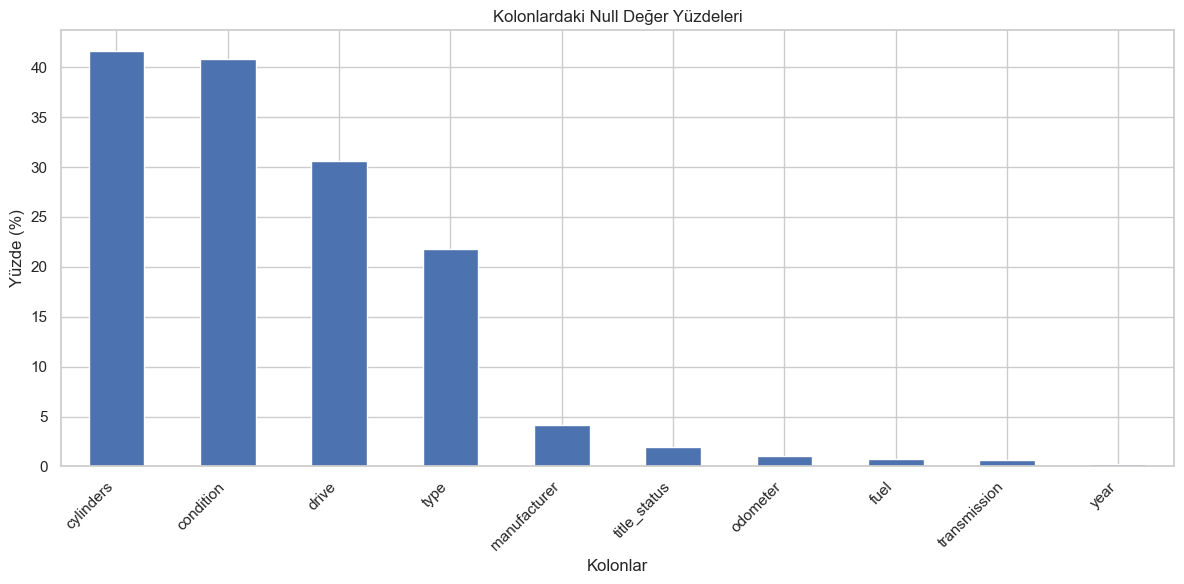


=== Satır Bazında Null Sayıları ===
0     128501
1     130084
2      79135
3      39858
4      44569
5       3884
6         89
7        129
8        539
9         24
10        68
Name: count, dtype: int64


In [19]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== Satır Bazında Null Sayıları ===")
print(df.isnull().sum(axis=1).value_counts().sort_index())

In [20]:
#En çok silindirde null var öncelikle silindirdeki otherleride null yapıcaz
#sonrasında marka ve modele göre median ile doldurucaz , en sonda cylinder sütununu numerice çeviricez

In [21]:
df["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [22]:
df.loc[df['cylinders'].str.contains('other', case=False, na=False), 'cylinders'] = np.nan

In [23]:
int(df["cylinders"].isna().sum())

178976

In [24]:
groupbyColumns = ["cylinders","fuel","transmission","drive","condition"]

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)

df["cylinders"].value_counts()

cylinders
6 cylinders     154013
8 cylinders     134288
4 cylinders     131992
5 cylinders       3117
10 cylinders      1513
3 cylinders       1107
12 cylinders       216
Name: count, dtype: int64

In [25]:
df["cylinders"] = df["cylinders"].str.split().str[0].astype(int)
print("Artık silindir sütunu numeric halde şu şekilde:")
df["cylinders"].value_counts()

Artık silindir sütunu numeric halde şu şekilde:


cylinders
6     154013
8     134288
4     131992
5       3117
10      1513
3       1107
12       216
Name: count, dtype: int64

In [26]:
df["year"] = df.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median())
)

In [27]:
df.dropna(subset=["manufacturer"],inplace=True)

In [28]:
df["odometer"] = df.groupby(["manufacturer","type","year"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

df.dropna(subset=["odometer"],inplace=True)

In [29]:
df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [30]:
def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1️⃣ Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2️⃣ Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3️⃣ Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\n✅ Type doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 86295
1️⃣ Model isminden type çıkarılıyor...
   Sonrası null: 49988
2️⃣ Manufacturer bazlı mode...
   Sonrası null: 0
3️⃣ Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

✅ Type doldurma tamamlandı!

Type dağılımı:
type
sedan          117634
SUV             90340
pickup          74020
truck           33492
other           21233
coupe           20649
hatchback       17236
van             10720
wagon           10536
convertible      7152
mini-van         4678
offroad           570
bus               314
Name: count, dtype: int64


In [31]:
df.isna().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64

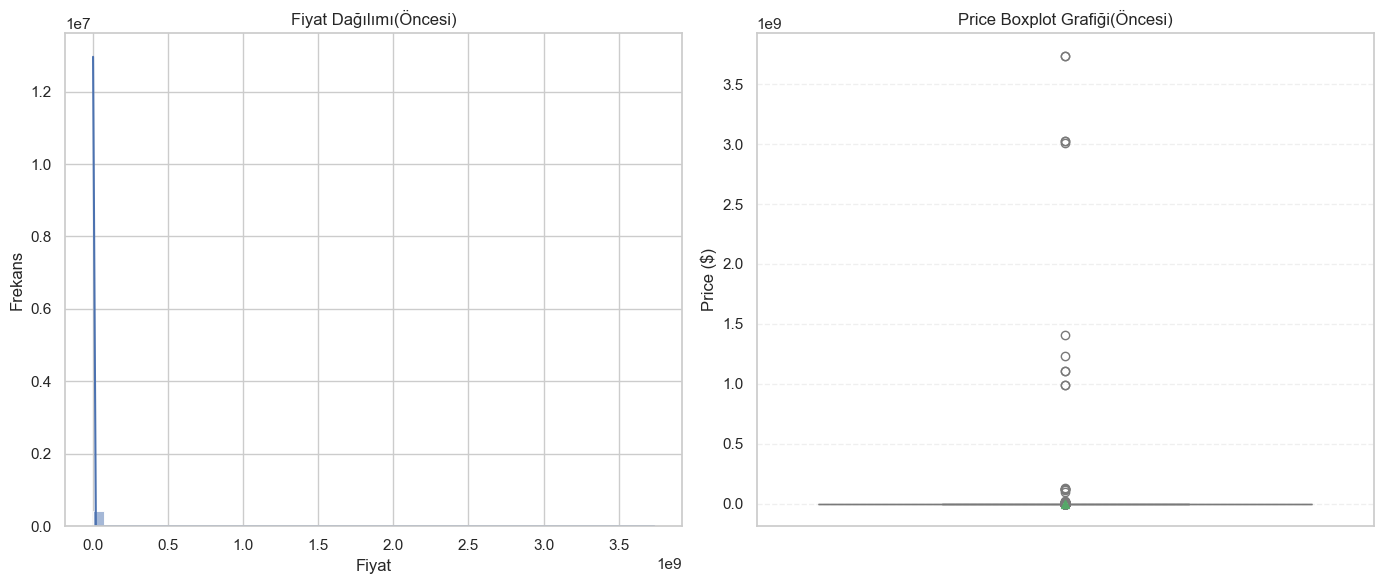

In [32]:
plt.figure(figsize=(14,6))  

plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Öncesi)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Öncesi)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


In [33]:
print(df["price"].describe())

count    4.085740e+05
mean     7.707018e+04
std      1.244920e+07
min      0.000000e+00
25%      5.975000e+03
50%      1.398000e+04
75%      2.599900e+04
max      3.736929e+09
Name: price, dtype: float64


In [34]:
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count       408574.000
mean         77070.183
std       12449200.510
min              0.000
25%           5975.000
50%          13980.000
75%          25999.000
max     3736928711.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 En YÜKSEK 20 fiyat:
[3736928711 3736928711 3024942282 3024942282 3009548743 1410065407
 1234567890 1111111111 1111111111  987654321  987654321  135008900
  123456789  123456789  123456789  123456789  113456789   99999999
   25003000   17000000]

 Fiyat Aralıkları:
$0 - $500 arası:      40,026 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,876 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,242 araba
$100,000 - $500,000:     441 araba
$500,000+:              57 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             31,390 araba
$1-100 arası:           3,141 araba
$1,000,000+:            51 arab

In [35]:
# YUKARIDA GÖZÜKTÜĞÜ ÜZERE AYKIRI DEĞERLERİMİZ VE YANLIL (0 VE 3736928711 GİBİ) DEĞERLER VAR BUNLARIN 
# TEMİZLENMESİ STANDART SAPMA İLE ORTALAMANIN OLABİLİDĞİNCE YAKIN OLMASI GEREKİYOR

In [36]:
df.drop(df[(df['price'] < 500) | (df['price'] > 100000)].index, inplace=True)

In [37]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count   368087.000
mean     19120.887
std      14257.204
min        500.000
25%       7900.000
50%      15949.000
75%      27981.000
max     100000.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500]

 En YÜKSEK 20 fiyat:
[100000 100000 100000 100000 100000 100000 100000 100000 100000 100000
 100000 100000 100000 100000 100000 100000 100000 100000 100000 100000]

 Fiyat Aralıkları:
$0 - $500 arası:      0 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,876 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,242 araba
$100,000 - $500,000:     37 araba
$500,000+:              0 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             0 araba
$1-100 arası:           0 araba
$1,000,000+:            0 araba


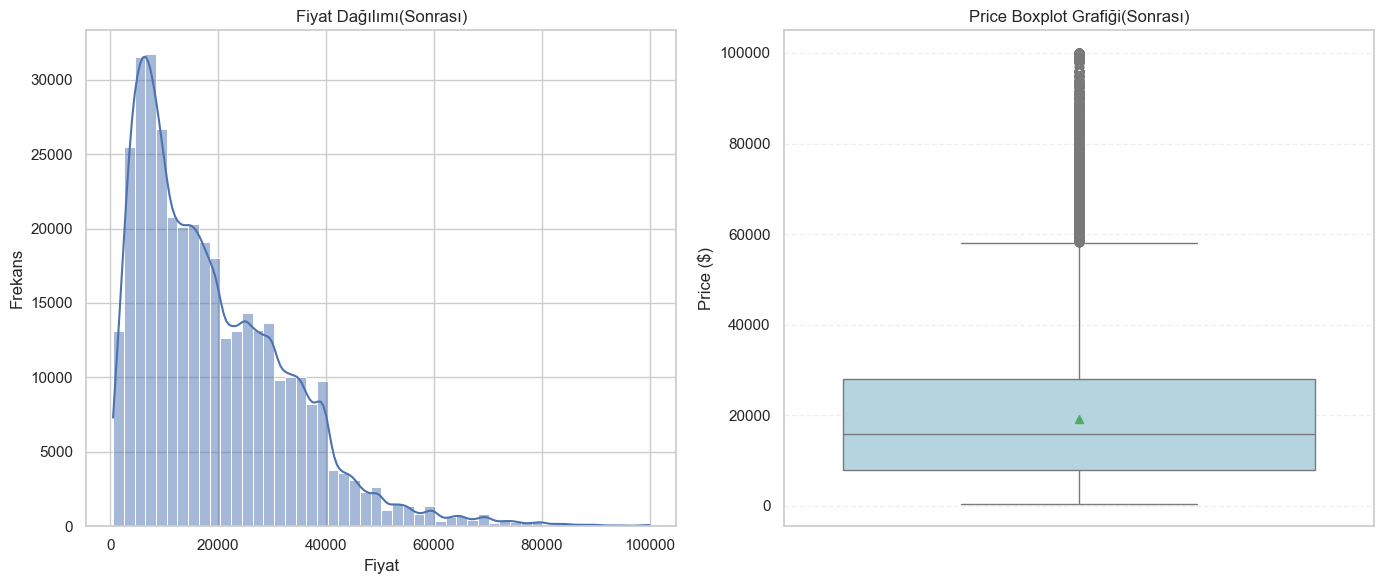

In [38]:
plt.figure(figsize=(14,6))  


plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Sonrası)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")


plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Sonrası)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


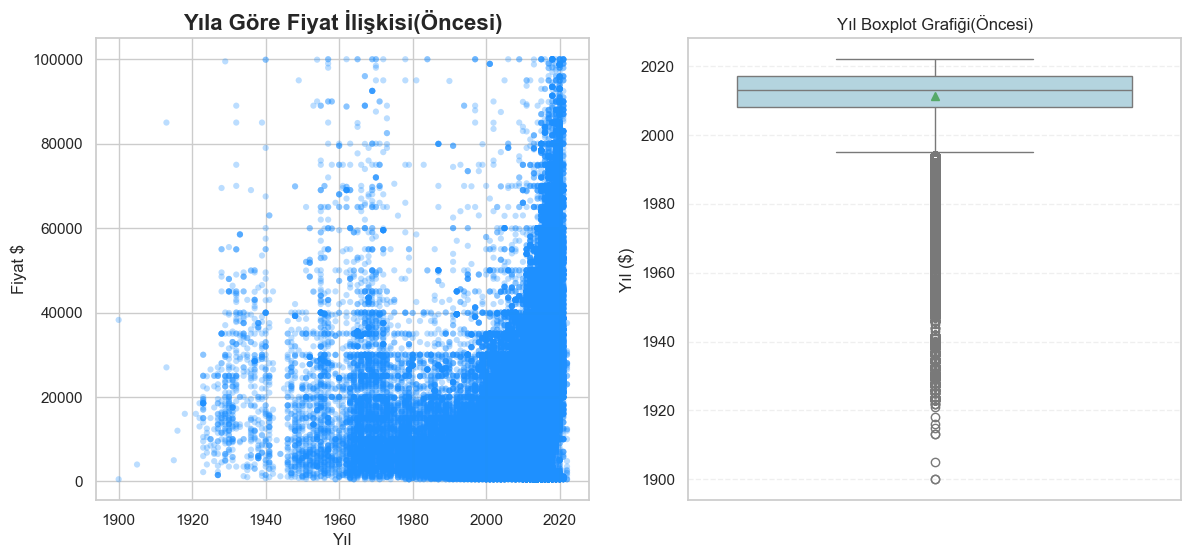

In [39]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Öncesi)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Öncesi)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

In [40]:
df = df[df["year"]>=1980]

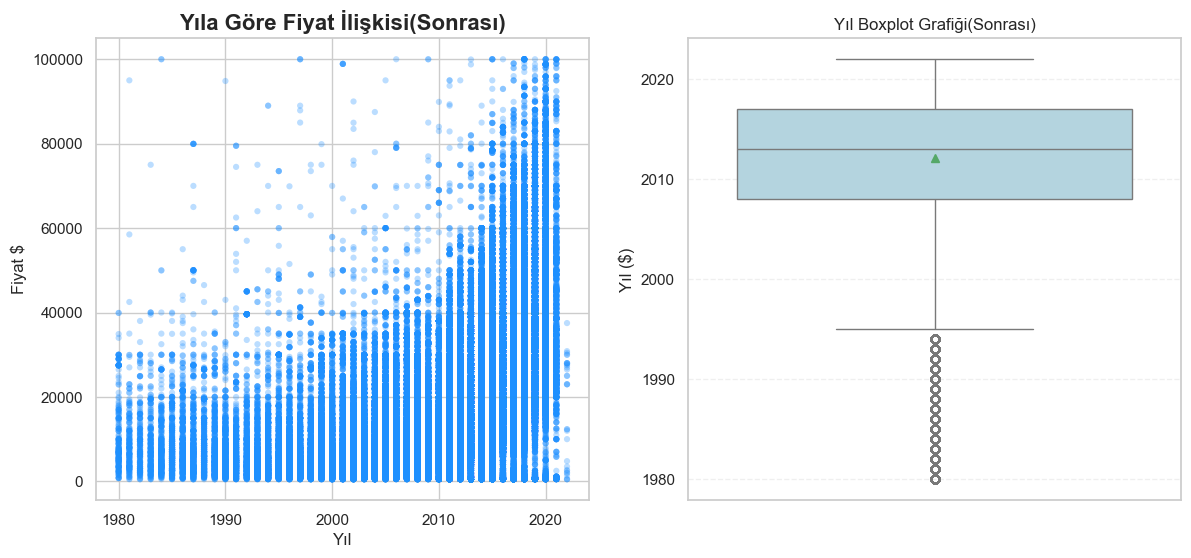

In [41]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Sonrası)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Sonrası)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

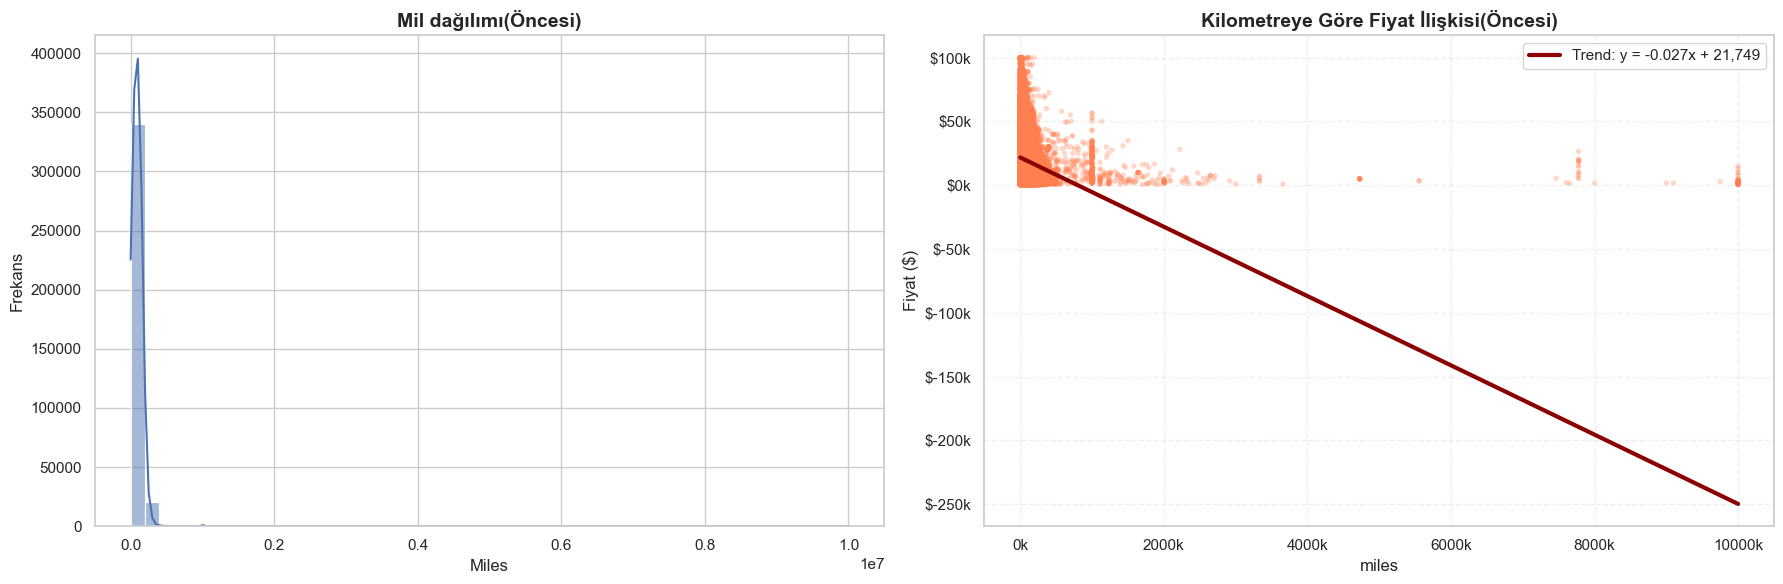

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Öncesi)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df['odometer'], df['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df['odometer'], df['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df['odometer'].unique()), 
             p(sorted(df['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Öncesi)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Formatter fonksiyonları
def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

# Sağ grafiğe formatter uygula
axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

In [43]:
#Garfikte dözüktüğü üzere odometer değişkenimizde outlier var bunlardan kurtulmamız gerekiyor.

In [44]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count     361745.000
mean       96432.214
std       138964.575
min            0.000
25%        39325.000
50%        89000.000
75%       136695.000
max     10000000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[10000000. 10000000. 10000000. 10000000. 10000000. 10000000. 10000000.
 10000000.  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.
  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.]

EXTREME DEĞERLER:
300k+ miles: 1,903 araba (0.53%)
400k+ miles: 656 araba (0.18%)
500k+ miles: 517 araba (0.14%)
1M+ miles: 247 araba (0.07%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 744 araba
0-1000 miles: 5,871 araba
1000-5000 miles: 6,499 araba


In [45]:
len(df[df["odometer"] > 300000])

1712

In [46]:
df = df[df["odometer"]<=300000]

In [47]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count   360033.000
mean     92765.829
std      61639.960
min          0.000
25%      39140.000
50%      88506.000
75%     135977.000
max     300000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000.]

EXTREME DEĞERLER:
300k+ miles: 191 araba (0.05%)
400k+ miles: 0 araba (0.00%)
500k+ miles: 0 araba (0.00%)
1M+ miles: 0 araba (0.00%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 744 araba
0-1000 miles: 5,871 araba
1000-5000 miles: 6,499 araba


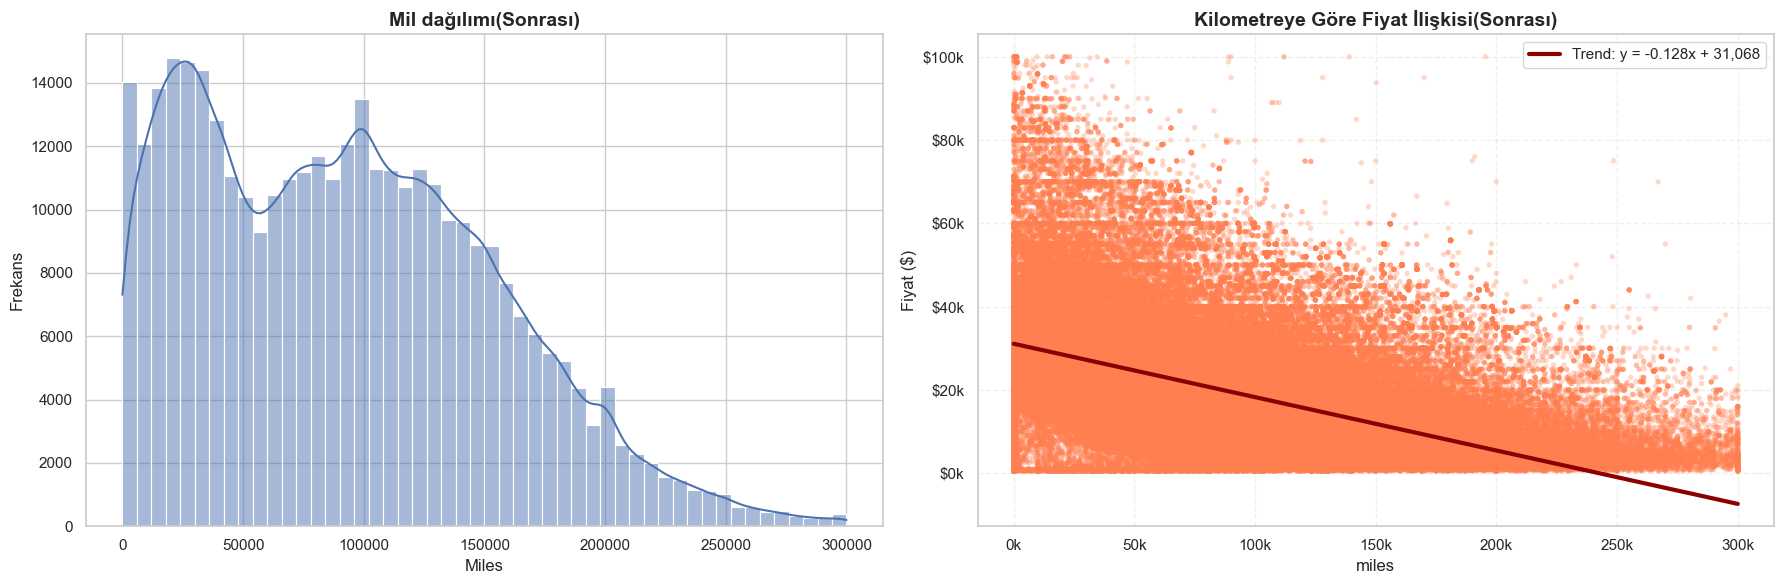

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Sonrası)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df['odometer'], df['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df['odometer'], df['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df['odometer'].unique()), 
             p(sorted(df['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Sonrası)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

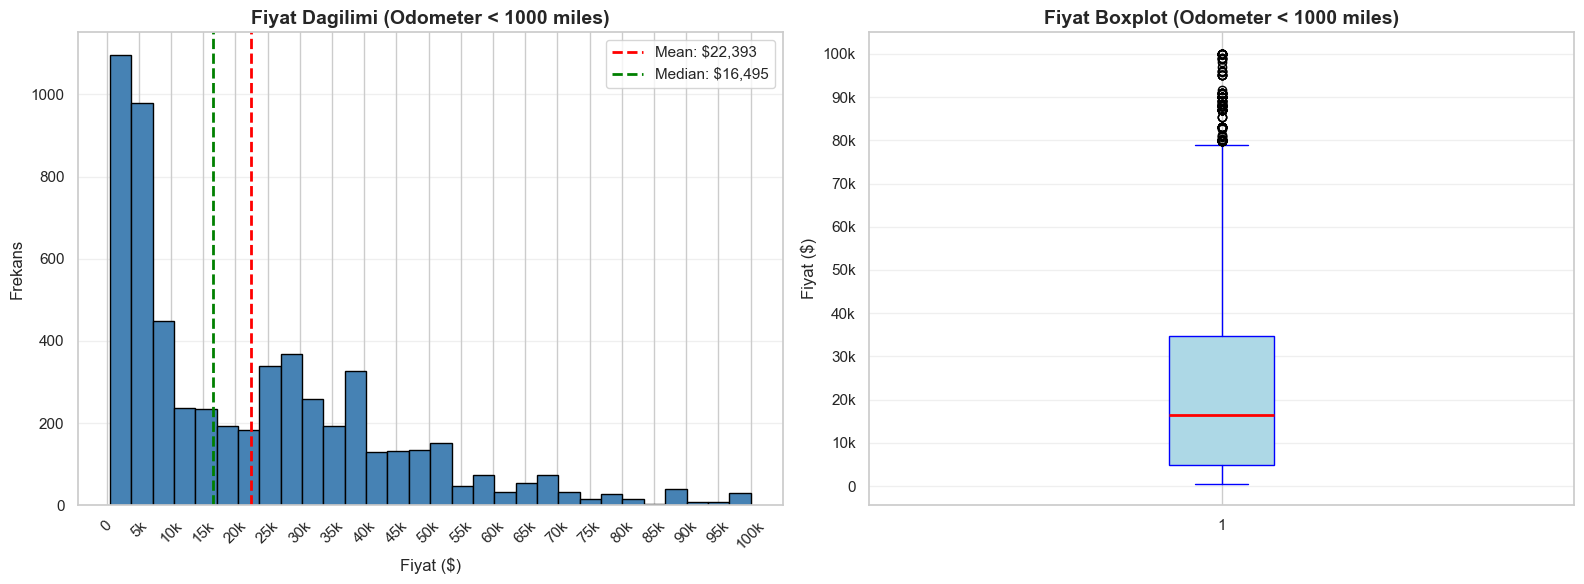

DUSUK KM ARABALAR ANALIZI (Odometer < 1000 miles)
Toplam araba sayisi: 5,871
Yuzde: 1.63%

Ortalama fiyat: $22,393
Median fiyat: $16,495
Min fiyat: $500
Max fiyat: $100,000
Std: $20,817

Ortalama yil: 2013

En populer manufacturer:
manufacturer
ford         1153
chevrolet    1022
toyota        402
jeep          388
honda         264
Name: count, dtype: int64


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

low_km_cars = df[df['odometer'] < 1000]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(low_km_cars['price'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Fiyat Dagilimi (Odometer < 1000 miles)', fontsize=14, weight='bold')
axes[0].set_xlabel('Fiyat ($)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)
axes[0].axvline(low_km_cars['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${low_km_cars["price"].mean():,.0f}')
axes[0].axvline(low_km_cars['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${low_km_cars["price"].median():,.0f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[0].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000])
axes[0].set_xticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', '45k', '50k', '55k', '60k', '65k', '70k', '75k', '80k', '85k', '90k', '95k', '100k'], rotation=45)

axes[1].boxplot(low_km_cars['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Fiyat Boxplot (Odometer < 1000 miles)', fontsize=14, weight='bold')
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

axes[1].set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
axes[1].set_yticklabels(['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k'])

plt.tight_layout()
plt.show()
print("="*70)
print("DUSUK KM ARABALAR ANALIZI (Odometer < 1000 miles)")
print("="*70)
print(f"Toplam araba sayisi: {len(low_km_cars):,}")
print(f"Yuzde: {len(low_km_cars)/len(df)*100:.2f}%")
print(f"\nOrtalama fiyat: ${low_km_cars['price'].mean():,.0f}")
print(f"Median fiyat: ${low_km_cars['price'].median():,.0f}")
print(f"Min fiyat: ${low_km_cars['price'].min():,.0f}")
print(f"Max fiyat: ${low_km_cars['price'].max():,.0f}")
print(f"Std: ${low_km_cars['price'].std():,.0f}")
print(f"\nOrtalama yil: {low_km_cars['year'].mean():.0f}")
print(f"\nEn populer manufacturer:")
print(low_km_cars['manufacturer'].value_counts().head(5))
print("="*70)

In [50]:
##Numeric değerlerin analizlerini yaptık outlier değerleri tespit eddip sildik artık sırada kategorik değişkenler var.

KATEGORIK DEGISKENLER GENEL BAKIS

Toplam kategorik degisken: 7
Degiskenler: ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']

    Degisken  Unique  Total  Null En Populer  En Populer Adet En Populer %
manufacturer      41 360033     0       ford            61498        17.1%
   condition       6 360033     0  excellent           184560        51.3%
        fuel       5 360033     0        gas           305963        85.0%
title_status       6 360033     0      clean           348056        96.7%
transmission       3 360033     0  automatic           284073        78.9%
       drive       3 360033     0        4wd           170287        47.3%
        type      13 360033     0      sedan           103827        28.8%


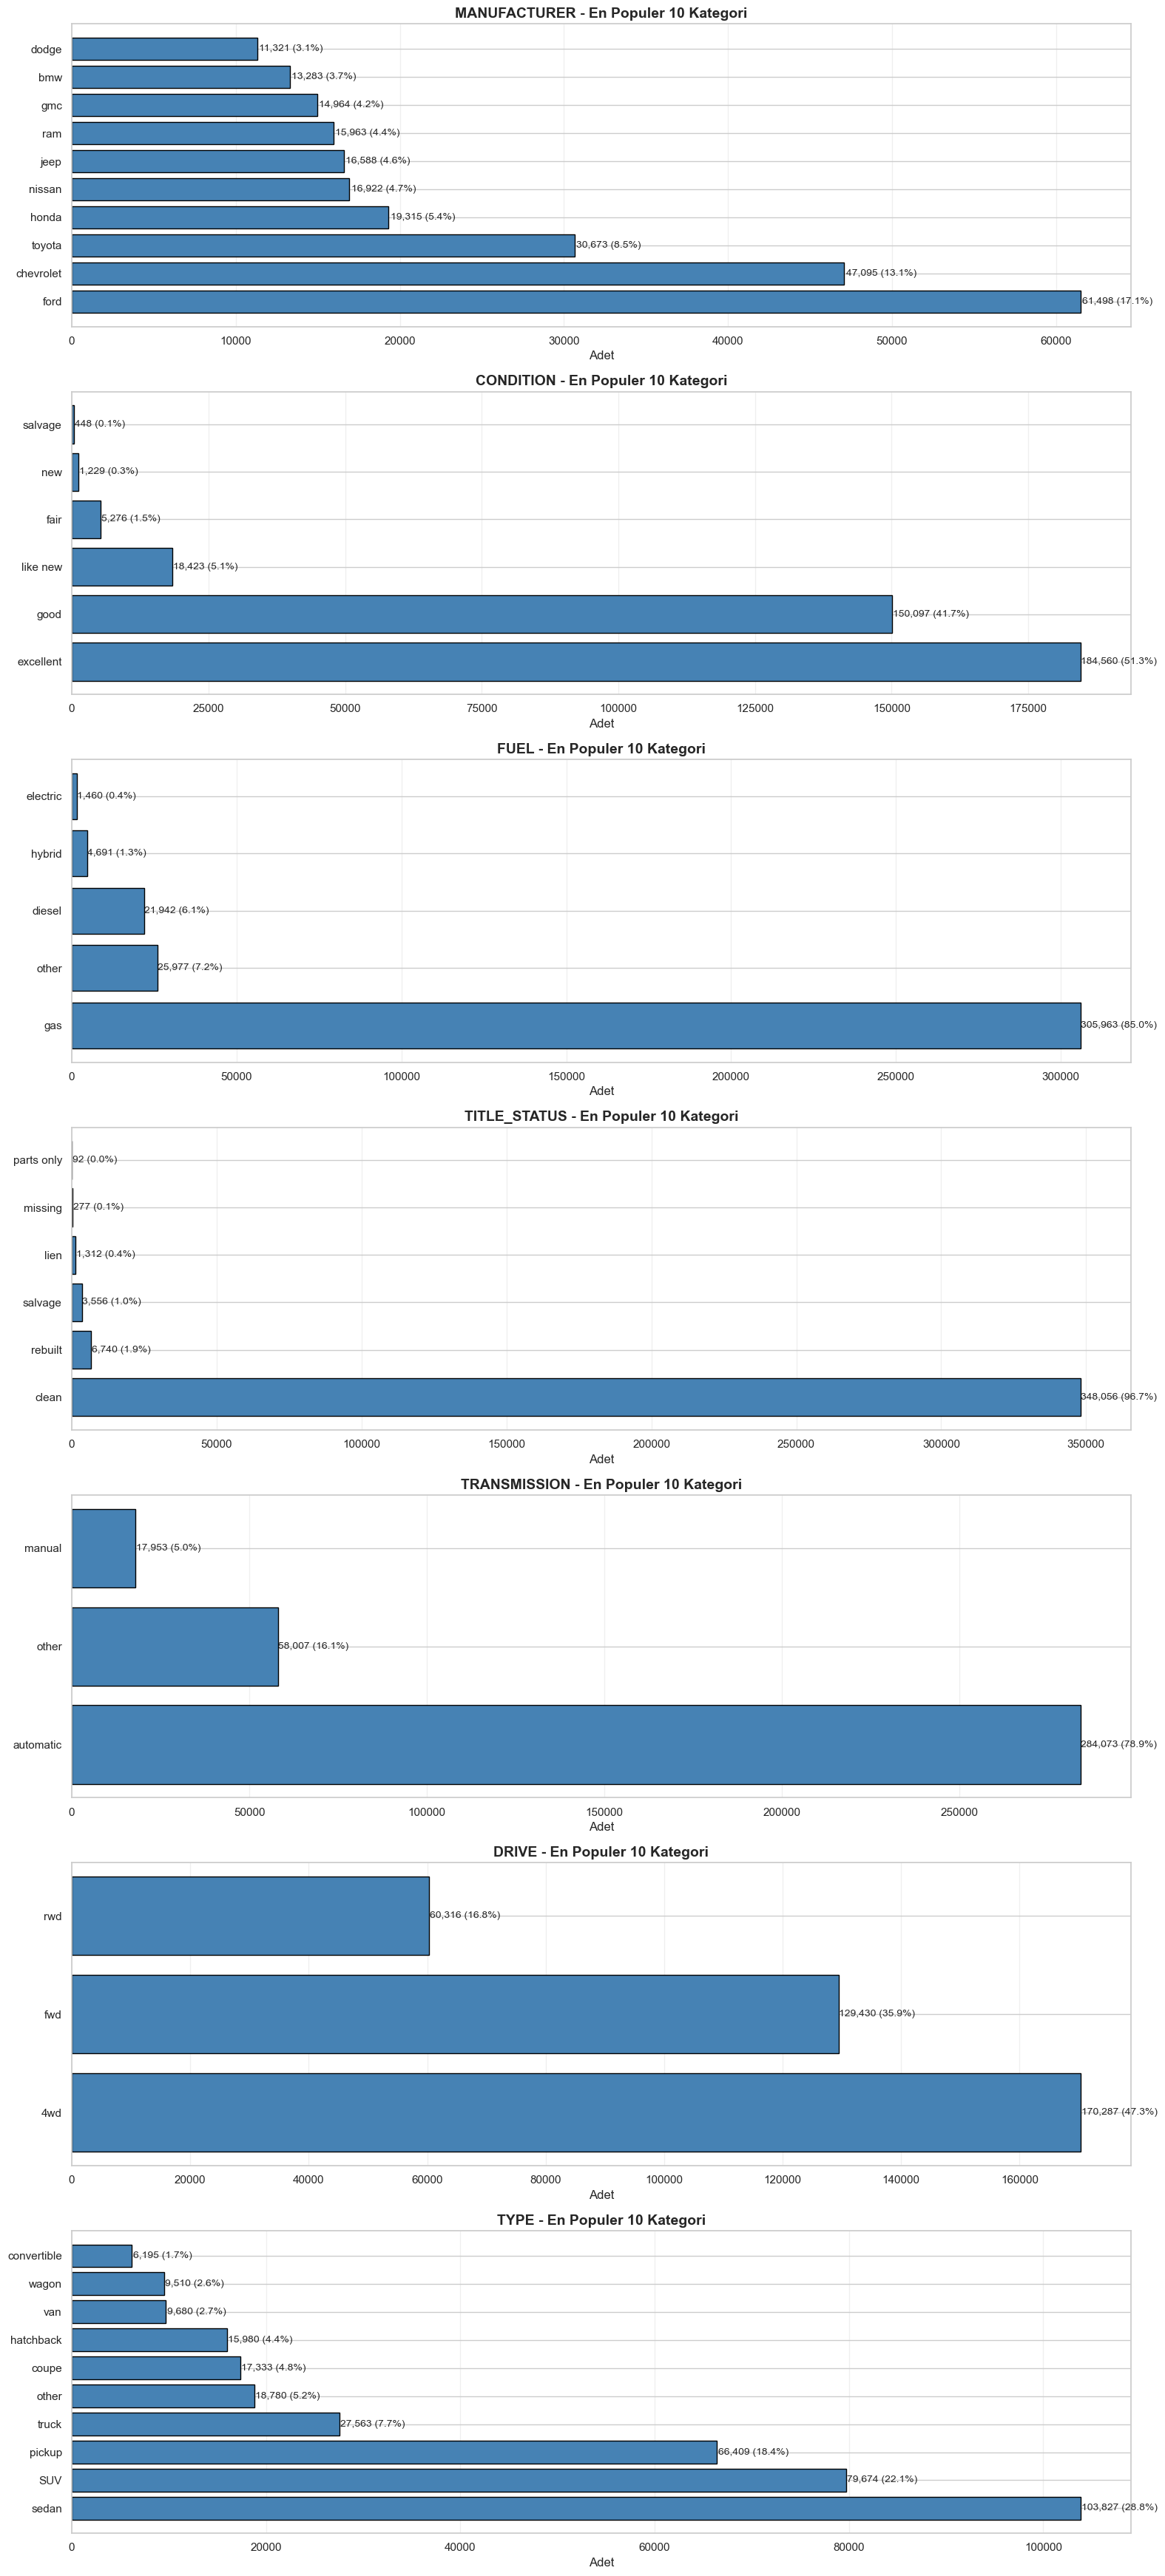


DETAYLI KATEGORI DAGILIMI

MANUFACTURER:
------------------------------------------------------------
  ford                 :  61,498 (17.08%)
  chevrolet            :  47,095 (13.08%)
  toyota               :  30,673 ( 8.52%)
  honda                :  19,315 ( 5.36%)
  nissan               :  16,922 ( 4.70%)
  jeep                 :  16,588 ( 4.61%)
  ram                  :  15,963 ( 4.43%)
  gmc                  :  14,964 ( 4.16%)
  bmw                  :  13,283 ( 3.69%)
  dodge                :  11,321 ( 3.14%)
  ... ve 31 kategori daha

CONDITION:
------------------------------------------------------------
  excellent            : 184,560 (51.26%)
  good                 : 150,097 (41.69%)
  like new             :  18,423 ( 5.12%)
  fair                 :   5,276 ( 1.47%)
  new                  :   1,229 ( 0.34%)
  salvage              :     448 ( 0.12%)

FUEL:
------------------------------------------------------------
  gas                  : 305,963 (84.98%)
  other         

In [51]:
print("="*80)
print("KATEGORIK DEGISKENLER GENEL BAKIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nToplam kategorik degisken: {len(categorical_cols)}")
print(f"Degiskenler: {categorical_cols}")

summary_data = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    total_count = df[col].count()
    null_count = df[col].isnull().sum()
    top_category = df[col].value_counts().index[0] if len(df[col].value_counts()) > 0 else 'N/A'
    top_count = df[col].value_counts().values[0] if len(df[col].value_counts()) > 0 else 0
    top_percent = (top_count / len(df)) * 100 if len(df) > 0 else 0
    
    summary_data.append({
        'Degisken': col,
        'Unique': unique_count,
        'Total': total_count,
        'Null': null_count,
        'En Populer': top_category,
        'En Populer Adet': top_count,
        'En Populer %': f"{top_percent:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print(summary_df.to_string(index=False))
print("="*80)

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    top_10 = df[col].value_counts().head(10)
    
    axes[idx].barh(range(len(top_10)), top_10.values, color='steelblue', edgecolor='black')
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(top_10.index)
    axes[idx].set_title(f'{col.upper()} - En Populer 10 Kategori', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Adet', fontsize=12)
    axes[idx].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_10.values):
        axes[idx].text(v + 100, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DETAYLI KATEGORI DAGILIMI")
print("="*80)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 60)
    value_counts = df[col].value_counts().head(10)
    for category, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"  {category:20} : {count:7,} ({percent:5.2f}%)")
    if df[col].nunique() > 10:
        print(f"  ... ve {df[col].nunique() - 10} kategori daha")
print("="*80)

In [52]:
#Yukarıdaki tabloyu incelediğim zaman gözüme ilk çarpan condition kısmındaki excellent araba oranının fazlalığı oldu.
#Bu sebeple aşşağıda km condition grafiği çizerek incelemek isityorum. 

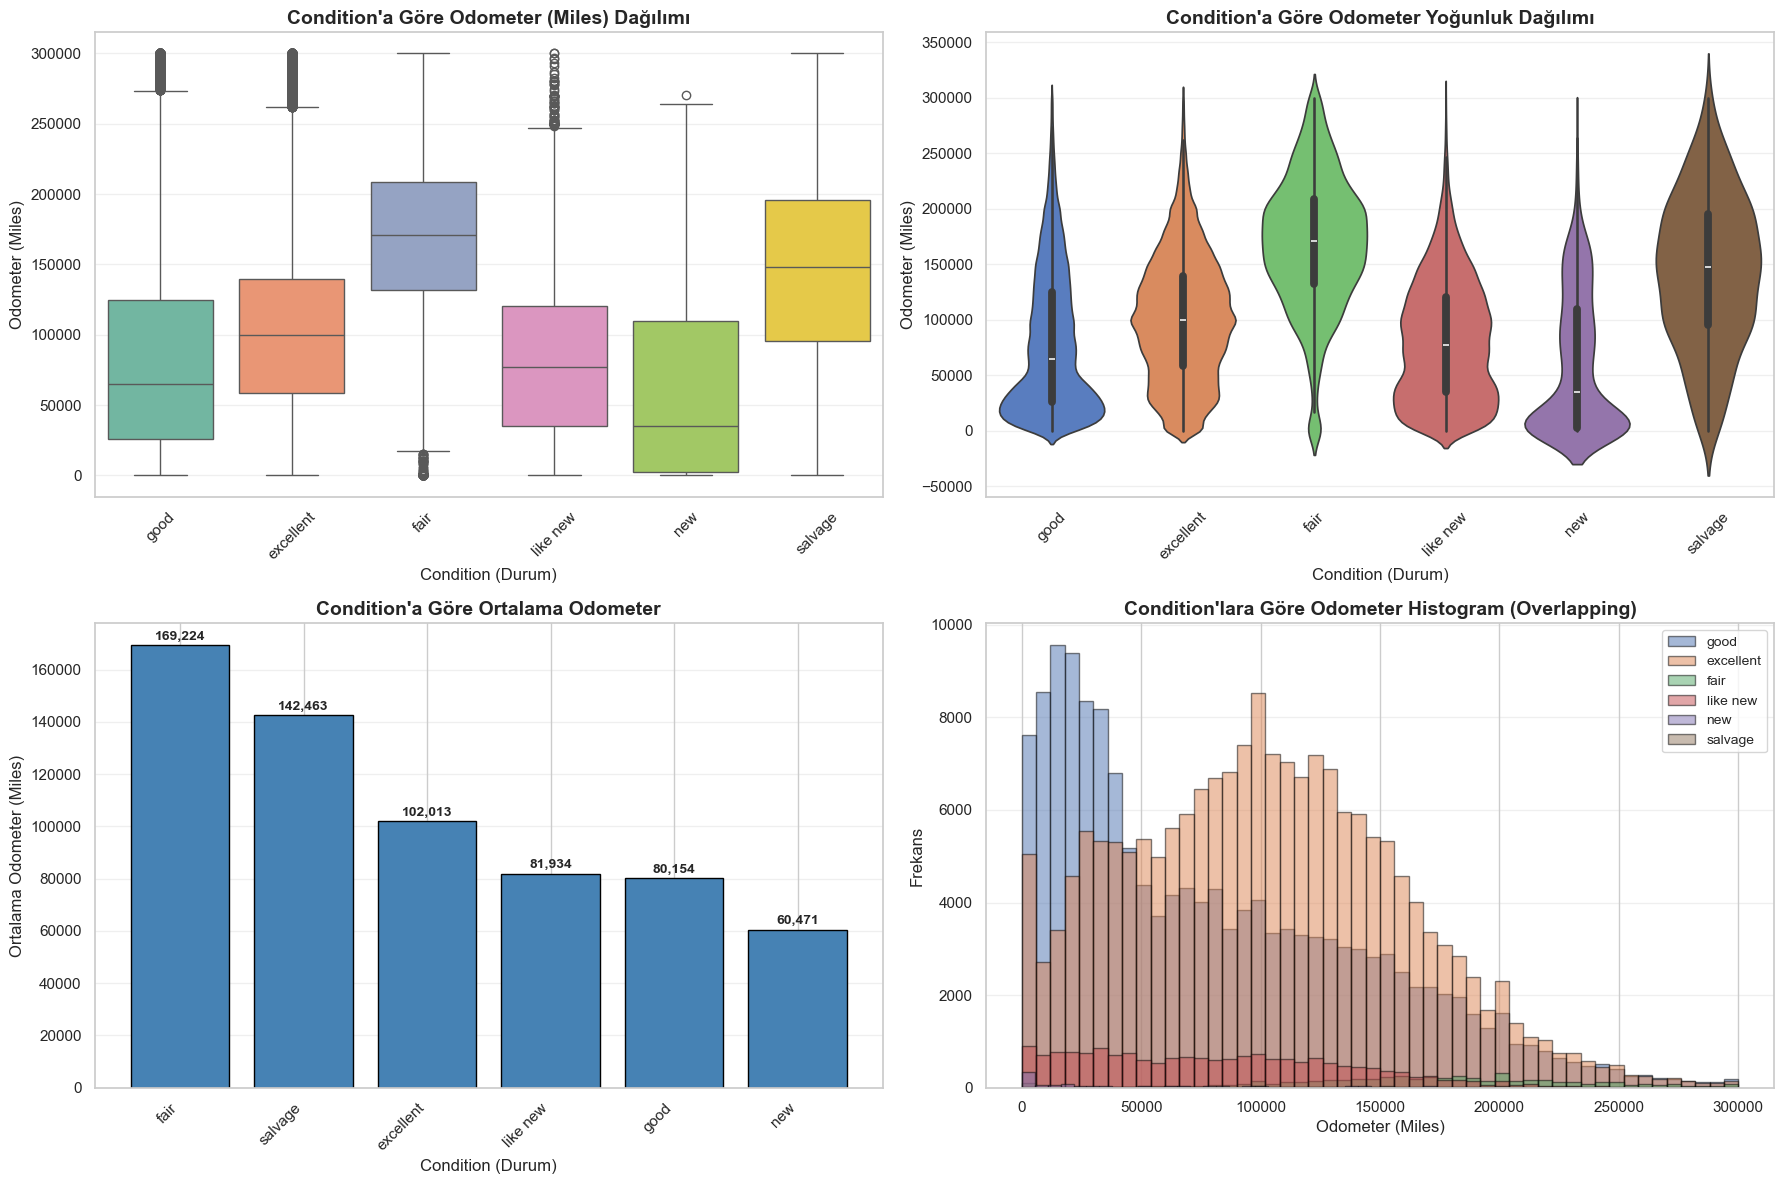

CONDITION vs ODOMETER İSTATİSTİKLERİ
            count       mean     median       std   min        max
condition                                                         
fair         5276 169224.497 170863.500 59881.088 0.000 300000.000
salvage       448 142462.730 148000.000 67989.275 0.000 300000.000
excellent  184560 102012.568 100000.000 56879.466 0.000 300000.000
like new    18423  81934.495  77075.000 54876.890 0.000 300000.000
good       150097  80153.968  64708.000 63990.675 0.000 300000.000
new          1229  60471.129  35235.000 61980.077 0.000 270807.000

CONDITION BAZINDA DETAYLI ANALİZ

FAIR:
  Araba sayısı: 5,276
  Ortalama mil: 169,224
  Median mil: 170,864
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 59,881

SALVAGE:
  Araba sayısı: 448
  Ortalama mil: 142,463
  Median mil: 148,000
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 67,989

EXCELLENT:
  Araba sayısı: 184,560
  Ortalama mil: 102,013
  Median mil: 100,000
  En düşük: 0
  En yüksek: 300,000
  Sta

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Figure boyutu
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1️⃣ Boxplot: Her condition için odometer dağılımı
sns.boxplot(data=df, x='condition', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Condition\'a Göre Odometer (Miles) Dağılımı', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Condition (Durum)', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2️⃣ Violin Plot: Dağılım yoğunluğu ile birlikte
sns.violinplot(data=df, x='condition', y='odometer', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Condition\'a Göre Odometer Yoğunluk Dağılımı', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Condition (Durum)', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3️⃣ Bar Chart: Her condition için ortalama odometer
condition_avg = df.groupby('condition')['odometer'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(condition_avg)), condition_avg.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xticks(range(len(condition_avg)))
axes[1, 0].set_xticklabels(condition_avg.index, rotation=45, ha='right')
axes[1, 0].set_title('Condition\'a Göre Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Condition (Durum)', fontsize=12)
axes[1, 0].set_ylabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Değerleri bar'ların üstüne yazdır
for i, v in enumerate(condition_avg.values):
    axes[1, 0].text(i, v + 2000, f'{v:,.0f}', ha='center', fontsize=10, weight='bold')

# 4️⃣ Histogram: Her condition için ayrı histogram (overlapping)
for condition in df['condition'].unique():
    subset = df[df['condition'] == condition]['odometer']
    axes[1, 1].hist(subset, bins=50, alpha=0.5, label=condition, edgecolor='black')

axes[1, 1].set_title('Condition\'lara Göre Odometer Histogram (Overlapping)', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Odometer (Miles)', fontsize=12)
axes[1, 1].set_ylabel('Frekans', fontsize=12)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 📊 İstatistiksel Özet
print("="*80)
print("CONDITION vs ODOMETER İSTATİSTİKLERİ")
print("="*80)
condition_stats = df.groupby('condition')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
condition_stats = condition_stats.sort_values('mean', ascending=False)
print(condition_stats)
print("="*80)

# 🔍 Detaylı Analiz
print("\n" + "="*80)
print("CONDITION BAZINDA DETAYLI ANALİZ")
print("="*80)
for condition in condition_stats.index:
    data = df[df['condition'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...

1️⃣ Condition düzeltiliyor (odometer + condition kombinasyonu)...

2️⃣ Değişim analizi yapılıyor...
   Toplam 244,793 satırda condition değişti (67.99%)

ÖNCESİ vs SONRASI KARŞILAŞTIRMA

📊 ORİJİNAL CONDITION DAĞILIMI:
condition_original
excellent    184560
fair           5276
good         150097
like new      18423
new            1229
salvage         448
Name: count, dtype: int64

Toplam: 360,033

📊 DÜZELTİLMİŞ CONDITION DAĞILIMI:
condition_corrected
excellent    144094
fair          48364
good         107475
like new      51070
new            8582
salvage         448
Name: count, dtype: int64

Toplam: 360,033

DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ
                      count       mean     median       std        min  \
condition_corrected                                                      
new                    8582   3150.791   1500.000  3420.538      0.000   
like new              51070  24303.933  25014.000 15107.332      0.000 

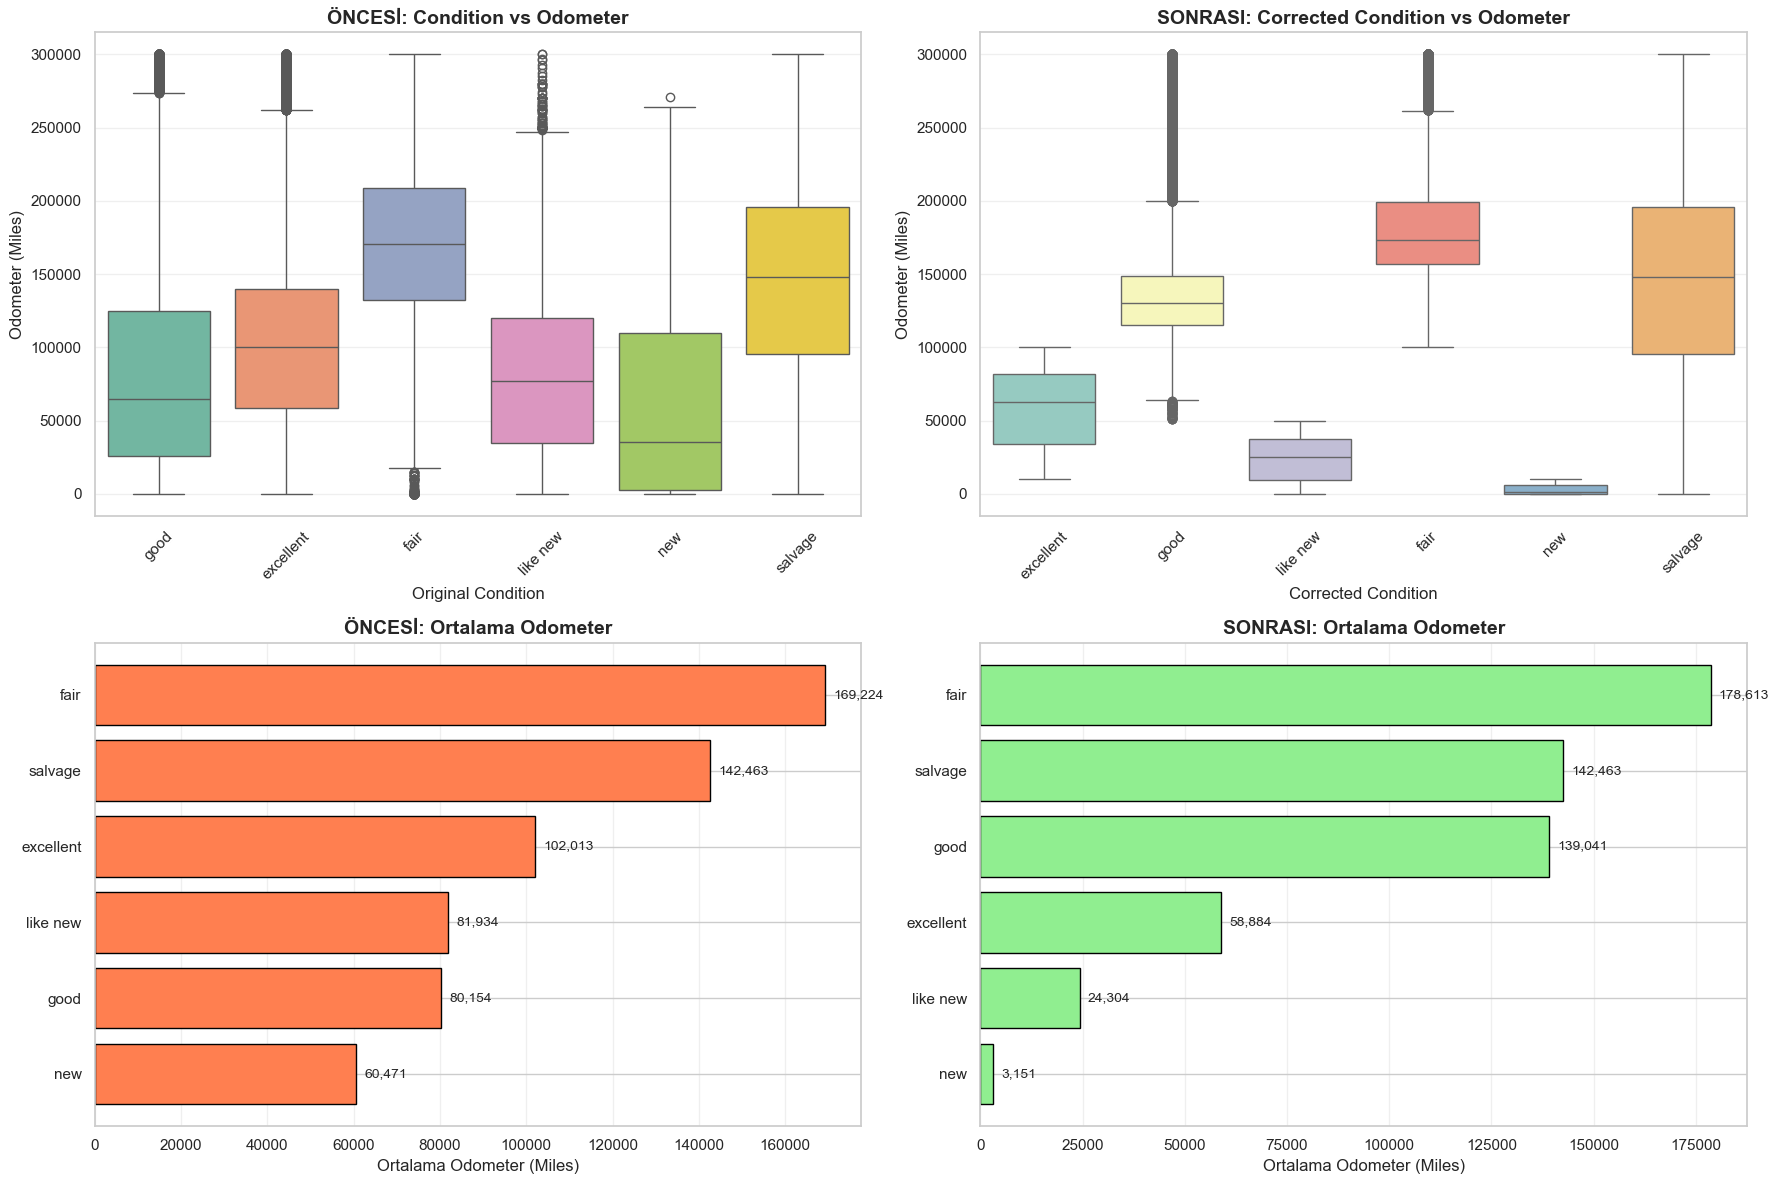


DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)
condition_corrected  excellent   fair    good  like new   new  salvage     All
condition_original                                                            
excellent                53272  36694   55546     32264  6784        0  184560
fair                        71   4621     477       107     0        0    5276
good                     85249      0   51452     13396     0        0  150097
like new                  5268   6714       0      5045  1396        0   18423
new                        234    335       0       258   402        0    1229
salvage                      0      0       0         0     0      448     448
All                     144094  48364  107475     51070  8582      448  360033

✅ CONDITION DÜZELTME TAMAMLANDI!
Yeni sütun: 'condition_corrected'
Orijinal sütun korundu: 'condition_original'
Toplam değişim: 244,793 satır (67.99%)


In [54]:
# ============================================================================
# STRATEJİ 1: CONDITION DÜZELTME (MİL BAZLI YENİDEN KATEGORİZASYON)
# ============================================================================

print("="*80)
print("CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...")
print("="*80)

# Orijinal condition'ı yedekle
df['condition_original'] = df['condition'].copy()

# Yeni condition_corrected sütunu oluştur
def correct_condition(row):
    """
    Odometer ve mevcut condition'a göre mantıklı condition ata
    """
    odometer = row['odometer']
    current_condition = row['condition']
    
    # SALVAGE her zaman salvage kalır (hasarlı araç)
    if current_condition == 'salvage':
        return 'salvage'
    
    # MİL BAZLI KATEGORİZASYON
    if odometer <= 10000:
        # 0-10k mil: Gerçekten yeni veya çok az kullanılmış
        if current_condition in ['new', 'like new', 'excellent']:
            return 'new'
        else:
            return 'like new'
    
    elif odometer <= 50000:
        # 10-50k mil: Yeni sayılır
        if current_condition in ['new', 'like new', 'excellent']:
            return 'like new'
        else:
            return 'excellent'
    
    elif odometer <= 100000:
        # 50-100k mil: İyi durumda
        if current_condition in ['new', 'like new', 'excellent', 'good']:
            return 'excellent'
        else:
            return 'good'
    
    elif odometer <= 150000:
        # 100-150k mil: Orta yaşlı
        if current_condition in ['excellent', 'good']:
            return 'good'
        else:
            return 'fair'
    
    else:
        # 150k+ mil: Yaşlı araç
        if current_condition == 'fair':
            return 'fair'
        elif current_condition == 'good':
            return 'good'
        else:
            return 'fair'

# Fonksiyonu uygula
print("\n1️⃣ Condition düzeltiliyor (odometer + condition kombinasyonu)...")
df['condition_corrected'] = df.apply(correct_condition, axis=1)

# Değişim analizi
print("\n2️⃣ Değişim analizi yapılıyor...")
changes = (df['condition_original'] != df['condition_corrected']).sum()
print(f"   Toplam {changes:,} satırda condition değişti ({changes/len(df)*100:.2f}%)")

# ============================================================================
# KARŞILAŞTIRMA ANALİZİ
# ============================================================================

print("\n" + "="*80)
print("ÖNCESİ vs SONRASI KARŞILAŞTIRMA")
print("="*80)

print("\n📊 ORİJİNAL CONDITION DAĞILIMI:")
print(df['condition_original'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

print("\n📊 DÜZELTİLMİŞ CONDITION DAĞILIMI:")
print(df['condition_corrected'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

# ============================================================================
# İSTATİSTİKSEL KARŞILAŞTIRMA
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ")
print("="*80)
corrected_stats = df.groupby('condition_corrected')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
corrected_stats = corrected_stats.sort_values('mean')
print(corrected_stats)

# ============================================================================
# DETAYLI ANALİZ
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION BAZINDA DETAYLI ANALİZ")
print("="*80)
for condition in corrected_stats.index:
    data = df[df['condition_corrected'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GÖRSELLEŞTİRME
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1️⃣ ÖNCESI: Boxplot
sns.boxplot(data=df, x='condition_original', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('ÖNCESİ: Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Original Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2️⃣ SONRASI: Boxplot
sns.boxplot(data=df, x='condition_corrected', y='odometer', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('SONRASI: Corrected Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Corrected Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3️⃣ ÖNCESI: Bar Chart (ortalama)
original_avg = df.groupby('condition_original')['odometer'].mean().sort_values()
axes[1, 0].barh(range(len(original_avg)), original_avg.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(original_avg)))
axes[1, 0].set_yticklabels(original_avg.index)
axes[1, 0].set_title('ÖNCESİ: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(original_avg.values):
    axes[1, 0].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

# 4️⃣ SONRASI: Bar Chart (ortalama)
corrected_avg = df.groupby('condition_corrected')['odometer'].mean().sort_values()
axes[1, 1].barh(range(len(corrected_avg)), corrected_avg.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(corrected_avg)))
axes[1, 1].set_yticklabels(corrected_avg.index)
axes[1, 1].set_title('SONRASI: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(corrected_avg.values):
    axes[1, 1].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# DEĞİŞİM MATRİSİ (Hangi condition'lar nasıl değişti?)
# ============================================================================

print("\n" + "="*80)
print("DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)")
print("="*80)
change_matrix = pd.crosstab(df['condition_original'], df['condition_corrected'], margins=True)
print(change_matrix)

print("\n" + "="*80)
print("✅ CONDITION DÜZELTME TAMAMLANDI!")
print("="*80)
print(f"Yeni sütun: 'condition_corrected'")
print(f"Orijinal sütun korundu: 'condition_original'")
print(f"Toplam değişim: {changes:,} satır ({changes/len(df)*100:.2f}%)")

In [55]:
df['condition'] = df['condition_corrected']
df.drop(columns=['condition_original', 'condition_corrected'], inplace=True)

In [56]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
27,33590,2014.000,gmc,excellent,8,gas,57923.000,clean,other,4wd,pickup
28,22590,2010.000,chevrolet,excellent,8,gas,71229.000,clean,other,4wd,pickup
29,39590,2020.000,chevrolet,excellent,8,gas,19160.000,clean,other,4wd,pickup
30,30990,2017.000,toyota,excellent,8,gas,41124.000,clean,other,4wd,pickup
31,15000,2013.000,ford,good,6,gas,128000.000,clean,automatic,rwd,truck


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360033 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         360033 non-null  int64  
 1   year          360033 non-null  float64
 2   manufacturer  360033 non-null  object 
 3   condition     360033 non-null  object 
 4   cylinders     360033 non-null  int64  
 5   fuel          360033 non-null  object 
 6   odometer      360033 non-null  float64
 7   title_status  360033 non-null  object 
 8   transmission  360033 non-null  object 
 9   drive         360033 non-null  object 
 10  type          360033 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 41.0+ MB


In [58]:
#Conditionı düzelttik şimdi fueldeki otherleri groupby ile doldurucaz

In [59]:
df["fuel"].value_counts()

fuel
gas         305963
other        25977
diesel       21942
hybrid        4691
electric      1460
Name: count, dtype: int64

In [60]:
df['fuel'] = df.groupby(['manufacturer', 'type'])['fuel'].transform(
    lambda x: x.replace('other', x.mode()[0]) if 'other' in x.values else x
)

In [61]:
df["fuel"].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [62]:
df["fuel"].value_counts()

fuel
gas         331012
diesel       21942
hybrid        4861
electric      1503
other          715
Name: count, dtype: int64

In [63]:
df = df[df["fuel"]!="other"]

In [64]:
df["fuel"].value_counts()

fuel
gas         331012
diesel       21942
hybrid        4861
electric      1503
Name: count, dtype: int64

In [65]:
##Condition düzeltildi kategorik değişkenlerin frekansları incelendi.
#Şimdi sırada kategorik değişkenlerdeki outlier değerleri incelemede

KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)
Analiz edilecek degiskenler: ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type']


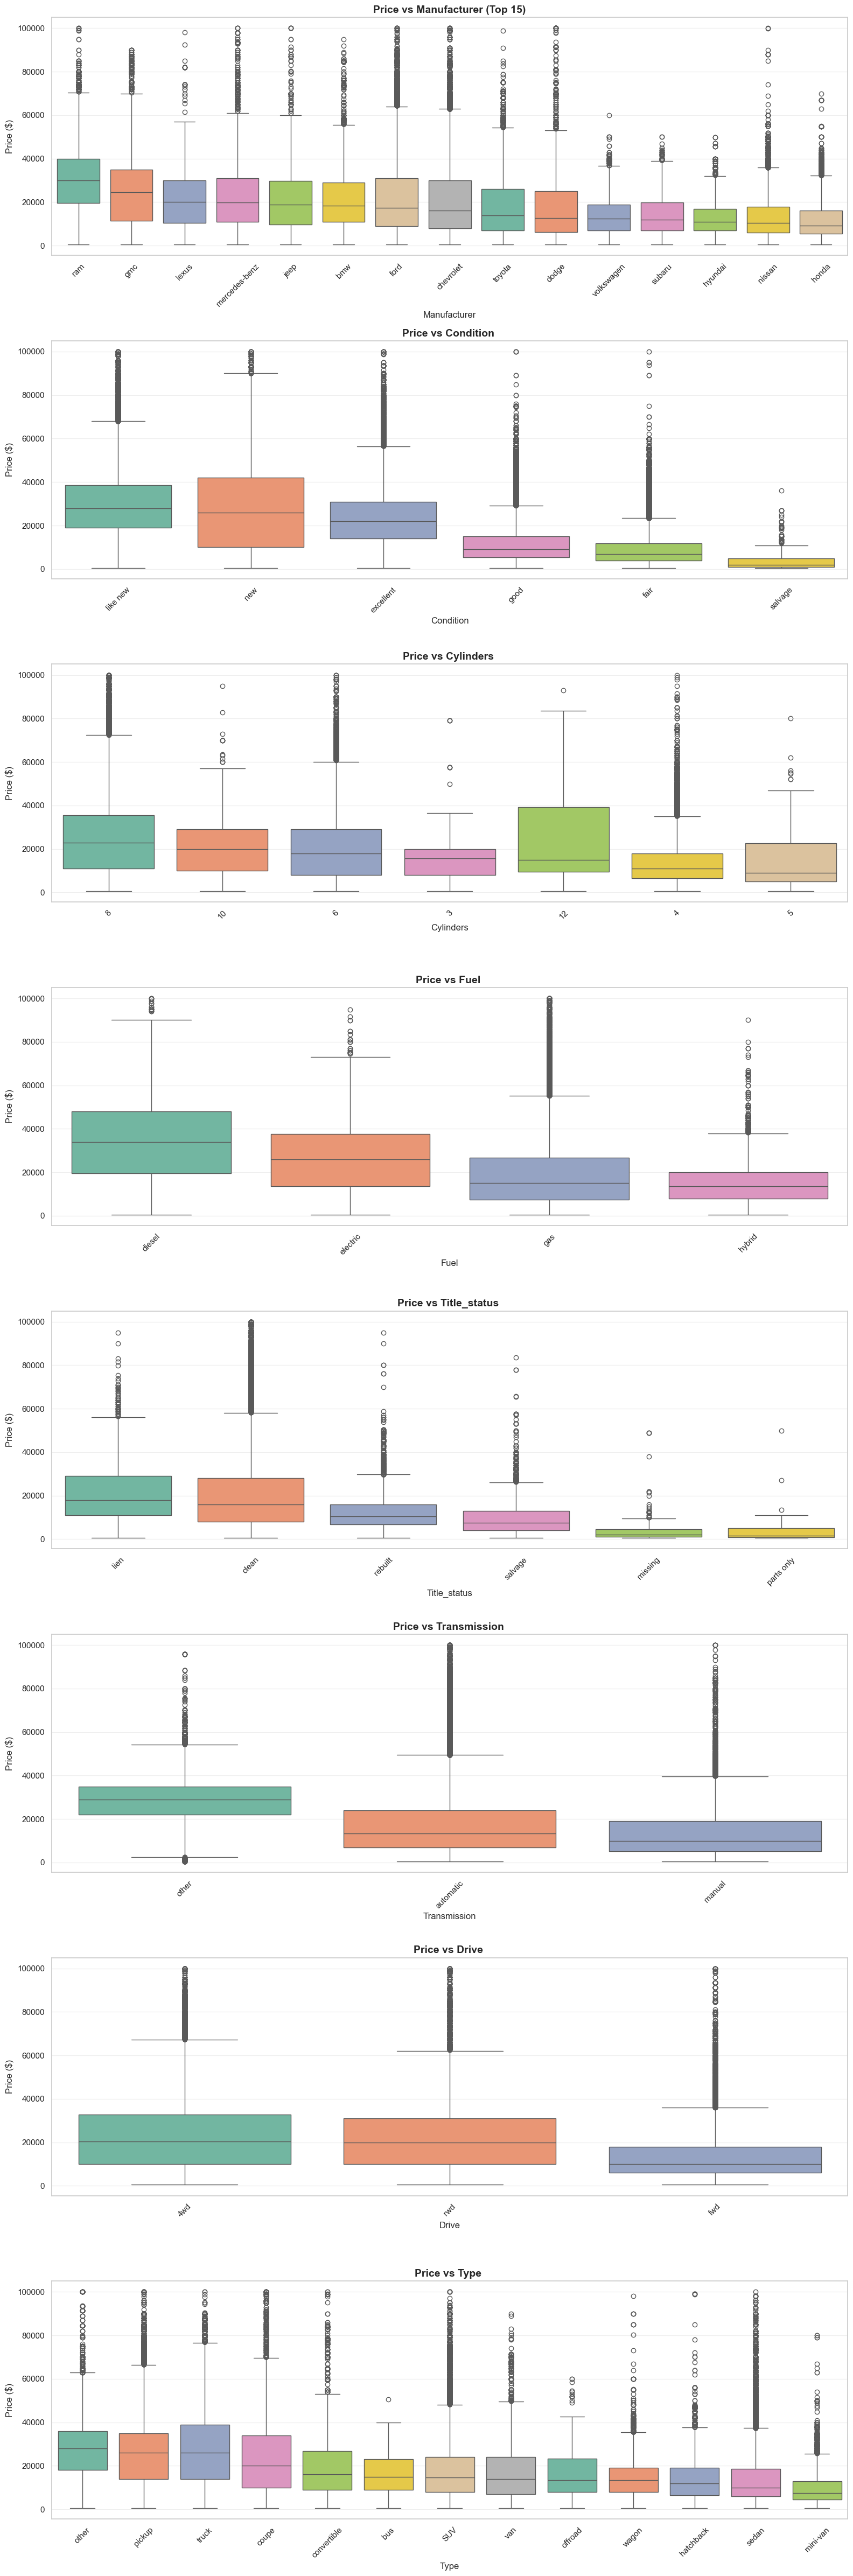


FIYAT ISTATISTIKLERI OZET

MANUFACTURER:
----------------------------------------------------------------------
 1. ferrari              | Med: $ 87,432 | Avg: $ 67,582 | n=20
 2. aston-martin         | Med: $ 46,998 | Avg: $ 46,561 | n=18
 3. tesla                | Med: $ 37,990 | Avg: $ 38,628 | n=739
 4. ram                  | Med: $ 29,999 | Avg: $ 30,448 | n=15,963
 5. porsche              | Med: $ 29,950 | Avg: $ 30,528 | n=1,212
 6. alfa-romeo           | Med: $ 28,163 | Avg: $ 28,740 | n=365
 7. rover                | Med: $ 25,995 | Avg: $ 28,863 | n=1,906
 8. jaguar               | Med: $ 25,990 | Avg: $ 26,218 | n=1,673
 9. audi                 | Med: $ 24,990 | Avg: $ 25,022 | n=6,981
10. gmc                  | Med: $ 24,590 | Avg: $ 25,494 | n=14,964

CONDITION:
----------------------------------------------------------------------
 1. like new             | Med: $ 28,000 | Avg: $ 29,963 | n=50,888
 2. new                  | Med: $ 25,995 | Avg: $ 29,399 | n=8,582
 3. exc

In [66]:
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type']

categorical_cols = [col for col in categorical_cols if col in df.columns]

print("="*70)
print("KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)")
print("="*70)
print(f"Analiz edilecek degiskenler: {categorical_cols}")

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 6*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    
    unique_count = df[col].nunique()
    
    if unique_count > 15:
        top_categories = df[col].value_counts().head(15).index
        df_filtered = df[df[col].isin(top_categories)]
        title_suffix = "(Top 15)"
    else:
        df_filtered = df
        title_suffix = ""
    
    order = df_filtered.groupby(col)['price'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_filtered, x=col, y='price', order=order, 
                palette='Set2', ax=axes[idx])
    
    axes[idx].set_title(f'Price vs {col.capitalize()} {title_suffix}', 
                        fontsize=14, weight='bold')
    axes[idx].set_xlabel(col.capitalize(), fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FIYAT ISTATISTIKLERI OZET")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 70)
    
    stats = df.groupby(col)['price'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    
    for idx, (category, row) in enumerate(stats.head(10).iterrows(), 1):
        print(f"{idx:2}. {str(category):20} | Med: ${row['median']:7,.0f} | "
              f"Avg: ${row['mean']:7,.0f} | n={int(row['count']):,}")

print("="*70)

In [67]:
#Transmission ile devam et yine otherler var çok fazla o sebeple  groupby yapıcaz

In [ ]:
df.loc[df['transmission'].str.contains('other', case=False, na=False), 'transmission'] = np.nan

In [ ]:
df["transmission"].isnull().sum()

In [ ]:
df["transmission"] = df.groupby(["manufacturer","type"],dropna=False)["transmission"].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )

In [ ]:
df["transmission"].value_counts()

In [ ]:
# ============================================================================
# 12 SİLİNDİR ARABALAR - GRAFİKLER
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 12 silindir arabaları filtrele
cyl_12 = df[df['cylinders'] == 12]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# 1. YIL DAĞILIMI (Histogram)
# ============================================================================
axes[0, 0].hist(cyl_12['year'], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('12 Silindir Arabalar - Yil Dagilimi', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Yil', fontsize=12)
axes[0, 0].set_ylabel('Adet', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# ============================================================================
# 2. FİYAT DAĞILIMI (Histogram)
# ============================================================================
axes[0, 1].hist(cyl_12['price'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('12 Silindir Arabalar - Fiyat Dagilimi', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Fiyat ($)', fontsize=12)
axes[0, 1].set_ylabel('Adet', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# ============================================================================
# 3. YIL vs FİYAT (Scatter Plot)
# ============================================================================
axes[1, 0].scatter(cyl_12['year'], cyl_12['price'], alpha=0.6, s=50, 
                   color='purple', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('12 Silindir Arabalar - Yil vs Fiyat', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Yil', fontsize=12)
axes[1, 0].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# Trend line ekle
z = np.polyfit(cyl_12['year'], cyl_12['price'], 1)
p = np.poly1d(z)
axes[1, 0].plot(sorted(cyl_12['year'].unique()), 
                p(sorted(cyl_12['year'].unique())), 
                color='red', linewidth=2, linestyle='--', label='Trend')
axes[1, 0].legend()

# ============================================================================
# 4. MARKA BAZINDA FİYAT (Box Plot)
# ============================================================================
# En fazla 12 silindir araç olan markaları al
top_brands = cyl_12['manufacturer'].value_counts().head(10).index
cyl_12_top = cyl_12[cyl_12['manufacturer'].isin(top_brands)]

order = cyl_12_top.groupby('manufacturer')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=cyl_12_top, x='manufacturer', y='price', order=order, 
            palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('12 Silindir Arabalar - Marka Bazinda Fiyat (Top 10)', 
                     fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Marka', fontsize=12)
axes[1, 1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*80)
print("12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER")
print("="*80)
print(f"\nToplam araba: {len(cyl_12):,}")
print(f"Ortalama fiyat: ${cyl_12['price'].mean():,.0f}")
print(f"Median fiyat: ${cyl_12['price'].median():,.0f}")
print(f"Min fiyat: ${cyl_12['price'].min():,.0f}")
print(f"Max fiyat: ${cyl_12['price'].max():,.0f}")
print(f"\nOrtalama yil: {cyl_12['year'].mean():.0f}")
print(f"En eski: {cyl_12['year'].min():.0f}")
print(f"En yeni: {cyl_12['year'].max():.0f}")
print("="*80)

In [ ]:
df.head()

In [ ]:
##FEATURE ENGINEERING

In [ ]:
df["car_age"] = (2025 - df["year"]).astype(int)

In [ ]:
df["mil_per_year"] = (df["odometer"] / df["car_age"]) 

In [ ]:
df.head()

In [ ]:
numeric_cols=[]
categorical_cols=[]

for col in df.columns:
    if df[col].dtype == object:
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

In [ ]:
numeric_cols

In [ ]:
categorical_cols

In [ ]:
## ORTALAMA ORTANCA DEĞERDEN BÜYÜKSE YUKARI YÖNLÜ YANİ OUTLİERLERİMİZ VARSA BU DEMEK OLUYORKİ BU SÜTUN SAĞA ÇARPIK
## BU SAĞA ÇARPIK DEĞERLERİ DAHA DÜZENLİ HALE GETİRMEK(NORMALİZE ETMEK) İÇİN LOG TRANSFORM İŞLMEİ YAPIYORUZ (SCALE ETMEK GİBİ DÜŞÜNÜLEBİLİR KABACA)
## FAKAT ÖNCELİKLE HANGİ SÜTUNLARIN SAĞA ÇARPIK OLDUĞUNU ANLAMAMIZ GEREKMEKTE.
## BU İŞLEMİ TABİKİ NUMERİK KOLONLARIMIZDA UYGULAYACAĞIZ.

In [ ]:
logTransform_columns = []

for col in numeric_cols:
    skew =df[col].skew()
    if skew >= 0.45:
        print(f"{col} için log transform gerekli skew oranı : {skew}")
        logTransform_columns.append(col)

In [ ]:
## Yukarıdaki grafiklerde gözüktüğü üzere bu 4 değişken için sağa doğru bir kuyruk var
## bu outlier değerlerin olduğu anlamına geliyor bu sebeple bu sütunlara log transform işlemi uygulayacağız

In [ ]:
logTransform_columns

In [ ]:
price_before = df['price'].copy()
odometer_before = df['odometer'].copy()
car_age_before = df['car_age'].copy()
mil_per_year_before = df['mil_per_year'].copy()

In [ ]:
for col in logTransform_columns:
    df[col]=np.log1p(df[col])

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# ============================================================================
# PRICE
# ============================================================================
axes[0, 0].hist(price_before, bins=50, color='red', edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'PRICE - ONCE\nSkewness: {price_before.skew():.3f}')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(price_before.mean(), color='blue', linestyle='--', label='Mean')
axes[0, 0].axvline(price_before.median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

axes[0, 1].hist(df['price'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'PRICE - SONRA (Log)\nSkewness: {df["price"].skew():.3f}')
axes[0, 1].set_xlabel('Log(Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['price'].mean(), color='blue', linestyle='--', label='Mean')
axes[0, 1].axvline(df['price'].median(), color='green', linestyle='--', label='Median')
axes[0, 1].legend()

# ============================================================================
# ODOMETER
# ============================================================================
axes[1, 0].hist(odometer_before, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'ODOMETER - ONCE\nSkewness: {odometer_before.skew():.3f}')
axes[1, 0].set_xlabel('Odometer (miles)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(odometer_before.mean(), color='blue', linestyle='--', label='Mean')
axes[1, 0].axvline(odometer_before.median(), color='green', linestyle='--', label='Median')
axes[1, 0].legend()

axes[1, 1].hist(df['odometer'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[1, 1].set_title(f'ODOMETER - SONRA (Log)\nSkewness: {df["odometer"].skew():.3f}')
axes[1, 1].set_xlabel('Log(Odometer)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df['odometer'].mean(), color='blue', linestyle='--', label='Mean')
axes[1, 1].axvline(df['odometer'].median(), color='green', linestyle='--', label='Median')
axes[1, 1].legend()

# ============================================================================
# CAR_AGE
# ============================================================================
axes[2, 0].hist(car_age_before, bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[2, 0].set_title(f'CAR_AGE - ONCE\nSkewness: {car_age_before.skew():.3f}')
axes[2, 0].set_xlabel('Car Age (years)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].axvline(car_age_before.mean(), color='blue', linestyle='--', label='Mean')
axes[2, 0].axvline(car_age_before.median(), color='green', linestyle='--', label='Median')
axes[2, 0].legend()

axes[2, 1].hist(df['car_age'], bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[2, 1].set_title(f'CAR_AGE - SONRA (Log)\nSkewness: {df["car_age"].skew():.3f}')
axes[2, 1].set_xlabel('Log(Car Age)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].axvline(df['car_age'].mean(), color='blue', linestyle='--', label='Mean')
axes[2, 1].axvline(df['car_age'].median(), color='green', linestyle='--', label='Median')
axes[2, 1].legend()

# ============================================================================
# MIL_PER_YEAR
# ============================================================================
axes[3, 0].hist(mil_per_year_before, bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[3, 0].set_title(f'MIL_PER_YEAR - ONCE\nSkewness: {mil_per_year_before.skew():.3f}')
axes[3, 0].set_xlabel('Miles per Year')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].axvline(mil_per_year_before.mean(), color='blue', linestyle='--', label='Mean')
axes[3, 0].axvline(mil_per_year_before.median(), color='green', linestyle='--', label='Median')
axes[3, 0].legend()

axes[3, 1].hist(df['mil_per_year'], bins=50, color='pink', edgecolor='black', alpha=0.7)
axes[3, 1].set_title(f'MIL_PER_YEAR - SONRA (Log)\nSkewness: {df["mil_per_year"].skew():.3f}')
axes[3, 1].set_xlabel('Log(Miles per Year)')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].axvline(df['mil_per_year'].mean(), color='blue', linestyle='--', label='Mean')
axes[3, 1].axvline(df['mil_per_year'].median(), color='green', linestyle='--', label='Median')
axes[3, 1].legend()

plt.tight_layout()
plt.show()

# OZET TABLO
print("="*80)
print("SKEWNESS KARSILASTIRMASI (ONCE vs SONRA)")
print("="*80)
print(f"{'KOLON':<20} {'ONCE':<15} {'SONRA':<15} {'IYILESME':<15}")
print("-"*80)
print(f"{'PRICE':<20} {price_before.skew():<15.3f} {df['price'].skew():<15.3f} {price_before.skew() - df['price'].skew():<15.3f}")
print(f"{'ODOMETER':<20} {odometer_before.skew():<15.3f} {df['odometer'].skew():<15.3f} {odometer_before.skew() - df['odometer'].skew():<15.3f}")
print(f"{'CAR_AGE':<20} {car_age_before.skew():<15.3f} {df['car_age'].skew():<15.3f} {car_age_before.skew() - df['car_age'].skew():<15.3f}")
print(f"{'MIL_PER_YEAR':<20} {mil_per_year_before.skew():<15.3f} {df['mil_per_year'].skew():<15.3f} {mil_per_year_before.skew() - df['mil_per_year'].skew():<15.3f}")
print("="*80)

In [ ]:
##Artık encode işlemlerine geçebiliriz, model sadece sayısal değerlerden anlar bu sebeple
#bizim kategorik verileri encode etmemiz gerekiyor

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler

In [ ]:
df_encoded = df.copy()

In [ ]:
le_encode_columns = ["manufacturer","fuel","transmission","drive","type"]
for col in le_encode_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col]) 

In [ ]:
df_encoded.head()

In [ ]:
ord_enc = OrdinalEncoder(categories=[["salvage", "fair", "good", "excellent","like new" , "new"]])
df_encoded["condition"] = ord_enc.fit_transform(df_encoded[["condition"]])

In [ ]:
ord_enc = OrdinalEncoder(categories=[["parts only", "missing", "salvage", "lien", "rebuilt", "clean"]])
df_encoded["title_status"] = ord_enc.fit_transform(df_encoded[["title_status"]])

In [ ]:
df_encoded["condition"] = df_encoded["condition"].astype(int)
df_encoded["title_status"] = df_encoded["title_status"].astype(int)

In [ ]:
df_encoded.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_encoded.drop("price",axis=1)
y = df_encoded["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.80,random_state=5)

In [ ]:
scaler = StandardScaler()

In [ ]:
numeric_cols.remove("price")

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train_scaled